<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#第一步：数据预处理" data-toc-modified-id="第一步：数据预处理-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>第一步：数据预处理</a></span><ul class="toc-item"><li><span><a href="#导入库" data-toc-modified-id="导入库-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>导入库</a></span></li><li><span><a href="#导入数据集" data-toc-modified-id="导入数据集-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>导入数据集</a></span></li><li><span><a href="#将数据集划分为训练集和测试集" data-toc-modified-id="将数据集划分为训练集和测试集-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>将数据集划分为训练集和测试集</a></span></li><li><span><a href="#特征缩放" data-toc-modified-id="特征缩放-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>特征缩放</a></span></li></ul></li><li><span><a href="#第二步：逻辑回归模型" data-toc-modified-id="第二步：逻辑回归模型-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>第二步：逻辑回归模型</a></span><ul class="toc-item"><li><span><a href="#将逻辑回归用于训练集" data-toc-modified-id="将逻辑回归用于训练集-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>将逻辑回归用于训练集</a></span></li></ul></li><li><span><a href="#第三步：预测结果" data-toc-modified-id="第三步：预测结果-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>第三步：预测结果</a></span></li><li><span><a href="#第四步：评估预测" data-toc-modified-id="第四步：评估预测-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>第四步：评估预测</a></span><ul class="toc-item"><li><span><a href="#生成混淆矩阵" data-toc-modified-id="生成混淆矩阵-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>生成混淆矩阵</a></span></li><li><span><a href="#可视化" data-toc-modified-id="可视化-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>可视化</a></span></li></ul></li></ul></div>

# 第一步：数据预处理

## 导入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 导入数据集

In [2]:
dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
dataset.shape

(400, 5)

In [6]:
# 由于前两列的数据对对结果没有影响，因而不考虑前两列
X = dataset.iloc[:, 2:-1].values # 第3，4列
Y = dataset.iloc[:, -1].values # 最后一列
print('X[:10]: \n{}'.format(X[:10]))
print('-' * 20)
print('Y: \n{}'.format(Y))

X[:10]: 
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]
--------------------
Y: 
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 

## 将数据集划分为训练集和测试集

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

## 特征缩放

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\z\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\z\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\z\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# 第二步：逻辑回归模型
该项工作的库将会是一个线性模型库，之所以被称为线性是因为逻辑回归是一个线性分类器，这意味着我们在二维空间中，我们两类用户（购买和不购买）将被一条直线分割。然后导入逻辑回归类。下一步我们将创建该类的对象，它将作为我们训练集的分类器。

## 将逻辑回归用于训练集

In [9]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

C:\Users\z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# 第三步：预测结果

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


# 第四步：评估预测

## 生成混淆矩阵

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print(cm)

[[65  3]
 [ 8 24]]


In [13]:
from sklearn.metrics import r2_score

print(r2_score(Y_test, y_pred))

0.49448529411764697


## 可视化

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


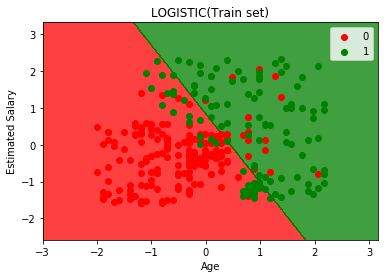

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


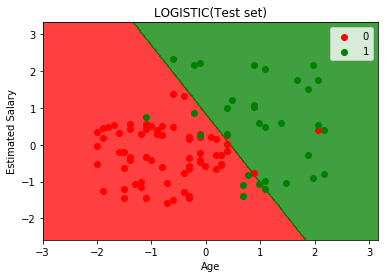

In [14]:
from matplotlib.colors import ListedColormap

X_set, Y_set = X_train, Y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j, 0], X_set[Y_set==j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
    
plt.title('LOGISTIC(Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


X_set,y_set=X_test,Y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                  np.arange(start=X_set[:,1].min() - 1, stop=X_set[:,1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('LOGISTIC(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()